# Regressão 01 - tarefa 03 - transformações em X e Y

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving previsao_de_renda.csv to previsao_de_renda.csv


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [ ]:
tips = sns.load_dataset("tips")
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.146808


In [ ]:
y, X = patsy.dmatrices("tip ~ sex + smoker + time + net_bill + 1", tips.head())
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [ ]:
reg = smf.ols("tip ~ sex + smoker + time + net_bill", tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.64e-20
Time:                        21:43:08   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg = smf.ols("tip ~ smoker + net_bill", tips).fit()
tips['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           4.56e-22
Time:                        21:43:10   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

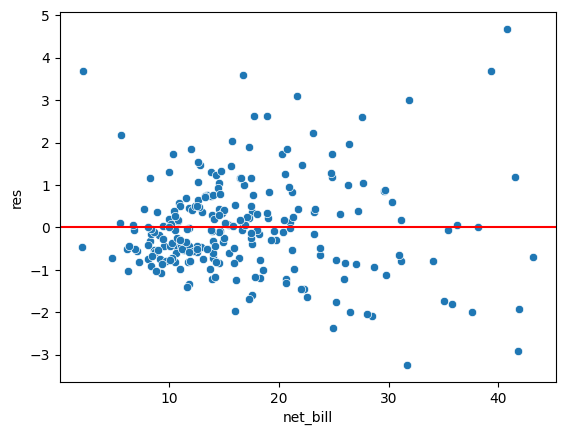

In [ ]:
sns.scatterplot(x = 'net_bill', y = 'res', data=tips)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [ ]:
reg = smf.ols("tip ~ smoker + np.log(net_bill)", tips).fit()#transformando em log
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           5.38e-19
Time:                        21:43:13   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg = smf.ols("tip ~ smoker + np.power(net_bill, 2)", tips).fit()#transformando em polinômio
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           1.04e-19
Time:                        21:43:14   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###COMPARANDO TODOS OS MODELOS, O PRIMEIRO SERIA MELHOR COM R² DE 33,5. MAS ENTRE LOG E POLINÔMIO, O POLINÔMIO SERIA UTIL COM O R² DE 30,4

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
y, X = patsy.dmatrices("np.log(tip) ~ sex + smoker + time + net_bill", tips.head())
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [ ]:
reg1 = smf.ols("np.log(tip) ~ sex + smoker + time + net_bill", tips).fit()
tips['res'] = reg1.resid
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           1.21e-18
Time:                        21:43:17   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg1 = smf.ols("np.log(tip) ~ smoker + net_bill", tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.31e-20
Time:                        21:43:19   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

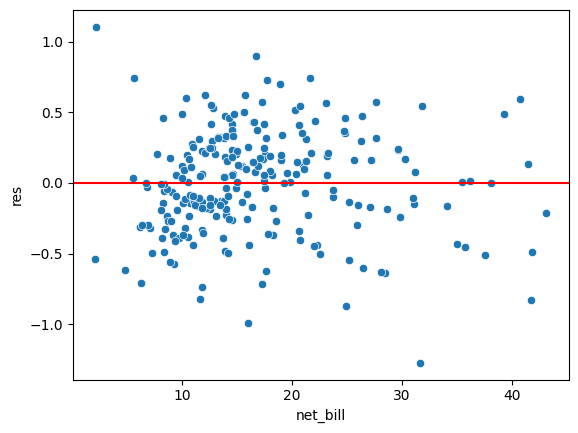

In [ ]:
sns.scatterplot(x = 'net_bill', y = 'res', data=tips)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [ ]:
reg1 = smf.ols("np.log(tip) ~ smoker + np.log(net_bill)", tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           7.20e-21
Time:                        21:43:22   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg1 = smf.ols("np.log(tip) ~ smoker + np.power(net_bill,2)", tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.81
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           5.45e-16
Time:                        21:43:24   Log-Likelihood:                -107.68
No. Observations:                 244   AIC:                             221.4
Df Residuals:                     241   BIC:                             231.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7562      0.048     15.764      0.000       0.662       0.851
smoker[T.No]              0.0492      0.050      0.978      0.329      -0.050       0.148
np.power(net_bill, 2)     0.0006   6.91e-05      9.034      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.759   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.801
Skew:                          -0.202   Prob(JB):                        0.406
Kurtosis:                       2.880   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
reg2 = smf.ols("tip ~ smoker + np.log(net_bill)", tips).fit()

In [ ]:
pred = reg2.fittedvalues

In [ ]:
r2_original = r2_score(tips['tip'], pred)
print("R² no tip original:", r2_original)

R² no tip original: 0.2946732367304479


###O modelo do item estaria melhor com 33,5 de R² enquanto do segundo teria somente 29,46

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
df = pd.read_csv("previsao_de_renda.csv")
df.head(4)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69


In [ ]:
df_copy = df.copy()

In [ ]:
modelo = smf.ols("renda ~ tempo_emprego + sexo + tipo_renda + qtd_filhos + idade + mau", data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     378.5
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:26:05   Log-Likelihood:            -1.2204e+05
No. Observations:               12466   AIC:                         2.441e+05
Df Residuals:                   12456   BIC:                         2.442e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        139.3798    199.073      0.700      0.484    -250.835     529.594
sexo[T.M]                       2325.9297     82.226     28.287      0.000    2164.754    2487.105
tipo_renda[T.Bolsista]          -234.9541   2161.094     -0.109      0.913   -4471.033    4001.124
tipo_renda[T.Empresário]        1080.9299     89.889     12.025      0.000     904.734    1257.126
tipo_renda[T.Pensionista]       1986.6587   1462.637      1.358      0.174    -880.337    4853.654
tipo_renda[T.Servidor público]   499.1112    129.998      3.839      0.000     244.294     753.928
mau[T.True]                      -17.0182    256.153     -0.066      0.947    -519.118     485.082
tempo_emprego                    298.7891      6.144     48.630      0.000     286.746     310.833
qtd_filhos                        73.8595     50.386      1.466      0.143     -24.905     172.624
idade                             29.0161      4.569      6.350      0.000      20.059      37.973
==============================================================================
Omnibus:                    10050.953   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           424257.605
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      30.673   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

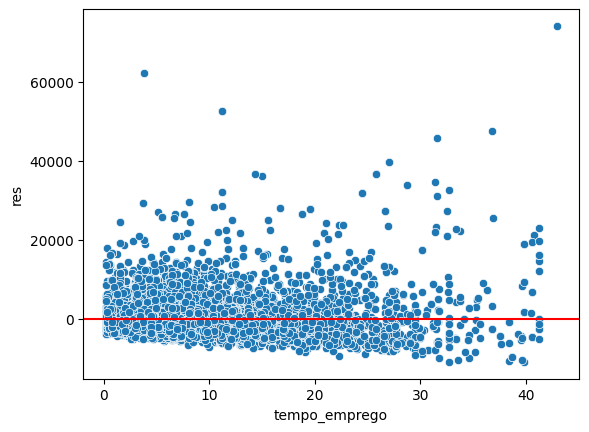

In [ ]:
df['res'] = modelo.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data=df)
plt.axhline(y=0, color='r', linestyle='-')

##Analise de resíduos

<Axes: xlabel='sexo', ylabel='res'>

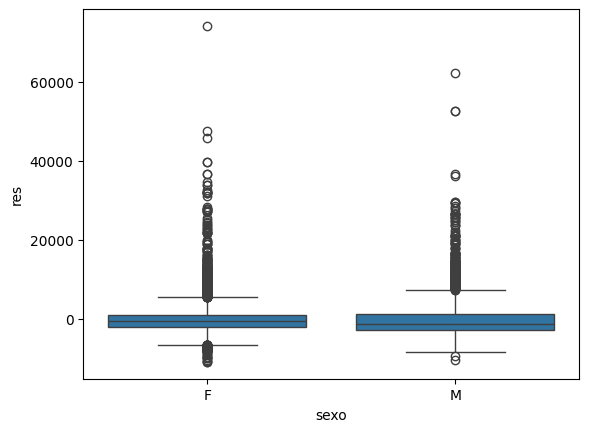

In [ ]:
sns.boxplot(x = 'sexo', y = 'res', data=df)

<Axes: xlabel='idade', ylabel='res'>

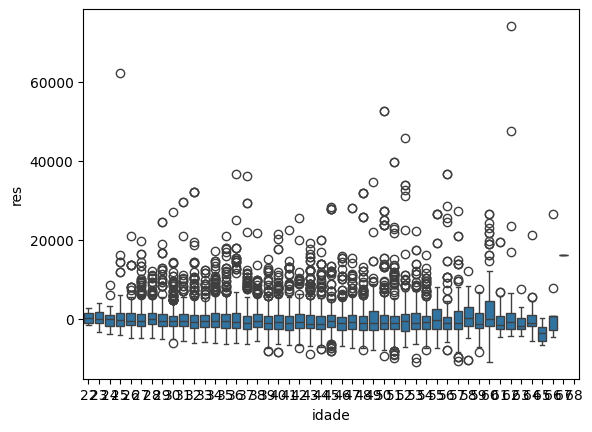

In [ ]:
sns.boxplot(x = 'idade', y = 'res', data=df)

<Axes: xlabel='mau', ylabel='res'>

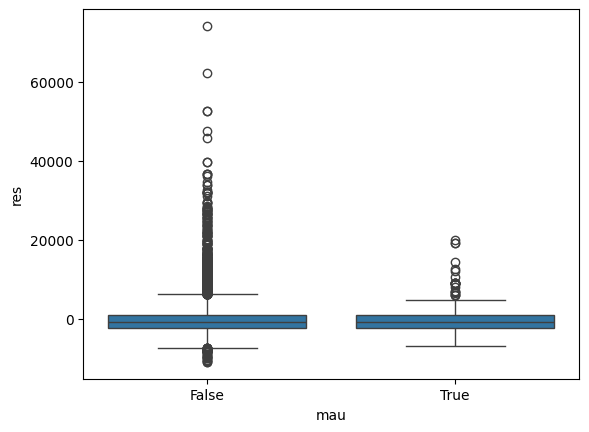

In [ ]:
sns.boxplot(x = 'mau', y = 'res', data=df)

<Axes: xlabel='qtd_filhos', ylabel='res'>

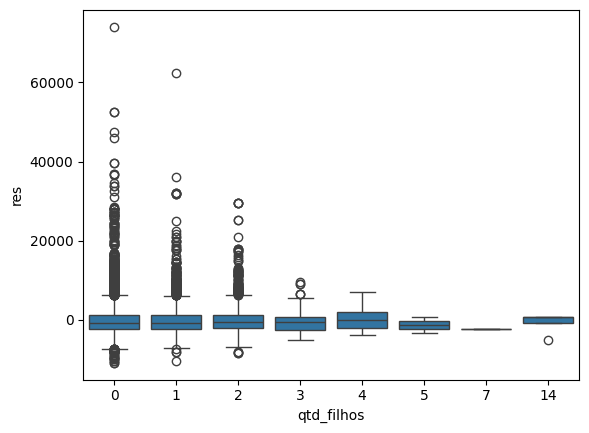

In [ ]:
sns.boxplot(x = 'qtd_filhos', y = 'res', data=df)

<Axes: xlabel='tipo_renda', ylabel='res'>

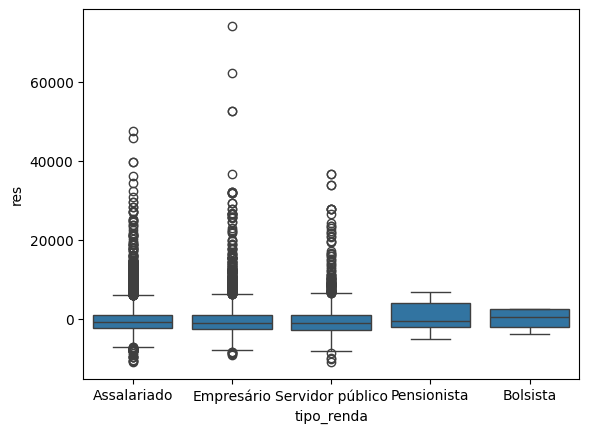

In [ ]:
sns.boxplot(x = 'tipo_renda', y = 'res', data=df)

##Retirada de variaveis insignificantes e analise de seus resíduos

In [ ]:
modelo = smf.ols("np.log(renda) ~ tempo_emprego + sexo + tipo_renda + idade", data=df_copy).fit()
df_copy['res_log'] = modelo.resid
modelo.summary()

#o tipo de renda teve 4 dummies, duas significativa, então achei interessante deixar essa variavel

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     539.8
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:15:19   Log-Likelihood:                -13278.
No. Observations:               12466   AIC:                         2.657e+04
Df Residuals:                   12458   BIC:                         2.663e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.3481      0.030    245.254      0.000       7.289       7.407
sexo[T.M]                          0.4800      0.013     35.960      0.000       0.454       0.506
tipo_renda[T.Bolsista]             0.0518      0.351      0.147      0.883      -0.637       0.740
tipo_renda[T.Empresário]           0.1877      0.015     12.848      0.000       0.159       0.216
tipo_renda[T.Pensionista]          0.4115      0.234      1.757      0.079      -0.048       0.871
tipo_renda[T.Servidor público]     0.1070      0.021      5.067      0.000       0.066       0.148
tempo_emprego                      0.0481      0.001     48.255      0.000       0.046       0.050
idade                              0.0049      0.001      6.886      0.000       0.004       0.006
==============================================================================
Omnibus:                        0.840   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.809
Skew:                          -0.007   Prob(JB):                        0.667
Kurtosis:                       3.037   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

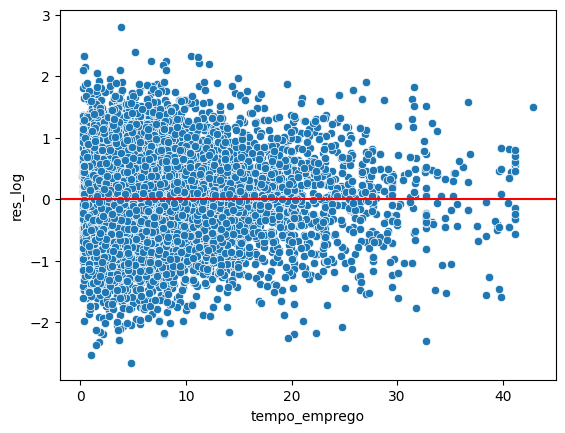

In [ ]:
sns.scatterplot(x='tempo_emprego', y='res_log', data=df_copy)
plt.axhline(y=0, color='r', linestyle='-')